<a href="https://colab.research.google.com/github/sethkipsangmutuba/Advanced-Chemical-Engineering-Technoeconomic-Analysis/blob/main/Sensitivity_Analysis_Dartmouth_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SECTION A**

In [ ]:
import pandas as pd
import numpy as np

# Define the baseline MESP value
baseline_MESP = 2.95  # baseline MESP value

# Define the parameter values and corresponding MESP values
parameters = ["TCI ($)", "Income tax rate (%)", "Discount rate (%)", "Feedstock price ($/dt)",
              "NG price ($/MMBtu)", "Electricity price ($/kWh)", "Wet residue price ($/kg)",
              "Labor rate ($/hr)", "C6 hydrolysis yield (%)", "C6 fermentation yield (%)"]
baseline_values = [2745040, 23.1, 16.50, 77, 2.20, 0.077, 0.011, 33, 99, 99]
plus_10_percent_values = [value * 1.1 if isinstance(value, (int, float)) else value for value in baseline_values]
minus_10_percent_values = [value * 0.9 if isinstance(value, (int, float)) else value for value in baseline_values]
baseline_MESP_values = [baseline_MESP] * 10
plus_10_percent_MESP = [2.96, 2.99, 3.11, 3.01, 2.96, 2.96, 2.90, 2.96, 2.80, 2.80]
minus_10_percent_MESP = [2.72, 2.92, 2.80, 2.89, 2.94, 2.95, 3.01, 2.94, 3.13, 3.13]

# Calculate the difference between adjusted and baseline MESP values
delta_MESP_plus_10_percent = np.array(plus_10_percent_MESP) - baseline_MESP
delta_MESP_minus_10_percent = np.array(minus_10_percent_MESP) - baseline_MESP

# Create a DataFrame
df = pd.DataFrame({
    "Parameter": parameters,
    "Baseline Value": baseline_values,
    "+10% Value": plus_10_percent_values,
    "-10% Value": minus_10_percent_values,
    "Baseline MESP": baseline_MESP_values,
    "+10% MESP": plus_10_percent_MESP,
    "-10% MESP": minus_10_percent_MESP,
    "∆ MESP +10%": delta_MESP_plus_10_percent,
    "∆ MESP -10%": delta_MESP_minus_10_percent
})

# Display the DataFrame
df

,Parameter,Baseline Value,+10% Value,-10% Value,Baseline MESP,+10% MESP,-10% MESP,∆ MESP +10%,∆ MESP -10%
0,TCI ($),2745040.000,3.019544e+06,2.470536e+06,2.95,2.96,2.72,0.01,-0.23
1,Income tax rate (%),23.100,2.541000e+01,2.079000e+01,2.95,2.99,2.92,0.04,-0.03
2,Discount rate (%),16.500,1.815000e+01,1.485000e+01,2.95,3.11,2.80,0.16,-0.15
3,Feedstock price ($/dt),77.000,8.470000e+01,6.930000e+01,2.95,3.01,2.89,0.06,-0.06
4,NG price ($/MMBtu),2.200,2.420000e+00,1.980000e+00,2.95,2.96,2.94,0.01,-0.01
5,Electricity price ($/kWh),0.077,8.470000e-02,6.930000e-02,2.95,2.96,2.95,0.01,0.00
6,Wet residue price ($/kg),0.011,1.210000e-02,9.900000e-03,2.95,2.90,3.01,-0.05,0.06
7,Labor rate ($/hr),33.000,3.630000e+01,2.970000e+01,2.95,2.96,2.94,0.01,-0.01
8,C6 hydrolysis yield (%),99.000,1.089000e+02,8.910000e+01,2.95,2.80,3.13,-0.15,0.18
9,C6 fermentation yield (%),99.000,1.089000e+02,8.910000e+01,2.95,2.80,3.13,-0.15,0.18


The sensitivity analysis reveals that Total Capital Investment (TCI), discount rate, and C6 hydrolysis and fermentation yields significantly impact the Minimum Ethanol Selling Price (MESP). A 10% reduction in TCI decreases MESP by $0.23/gal, while improving C6 yields by 10% reduces MESP by $0.15/gal each. Lowering the discount rate by 10% also cuts MESP by $0.15/gal. These findings suggest focusing on reducing capital costs and enhancing C6 yields through R&D. Additionally, negotiating lower feedstock prices and securing higher wet residue prices can further improve financial performance. Less impactful variables include natural gas, electricity, and labor costs.

In [ ]:
# Sort by absolute value of ∆ MESP
# Normalize the change in MESP values
df['Normalized ∆ MESP +10%'] = df['∆ MESP +10%'] / df['Baseline MESP']
df['Normalized ∆ MESP +10%']

0    0.003390
1    0.013559
2    0.054237
3    0.020339
4    0.003390
5    0.003390
6   -0.016949
7    0.003390
8   -0.050847
9   -0.050847
Name: Normalized ∆ MESP +10%, dtype: float64

The normalized ∆ MESP +10% values indicate that capital costs (TCI) and utility prices (NG, electricity) have minimal impact on MESP. Conversely, improvements in C6 hydrolysis and fermentation yields substantially lower MESP. Prioritizing R&D for yield improvements is recommended for significant cost reductions and enhanced financial performance.

In [ ]:
df['Normalized ∆ MESP -10%'] = df['∆ MESP -10%'] / df['Baseline MESP']
df['Normalized ∆ MESP -10%']

0   -0.077966
1   -0.010169
2   -0.050847
3   -0.020339
4   -0.003390
5    0.000000
6    0.020339
7   -0.003390
8    0.061017
9    0.061017
Name: Normalized ∆ MESP -10%, dtype: float64

A 10% reduction in capital costs shows the largest impact on reducing MESP, while decreasing C6 hydrolysis and fermentation yields by 10% increases MESP. Thus, minimizing capital expenditure and maximizing yield efficiency are critical for cost-effective operation.

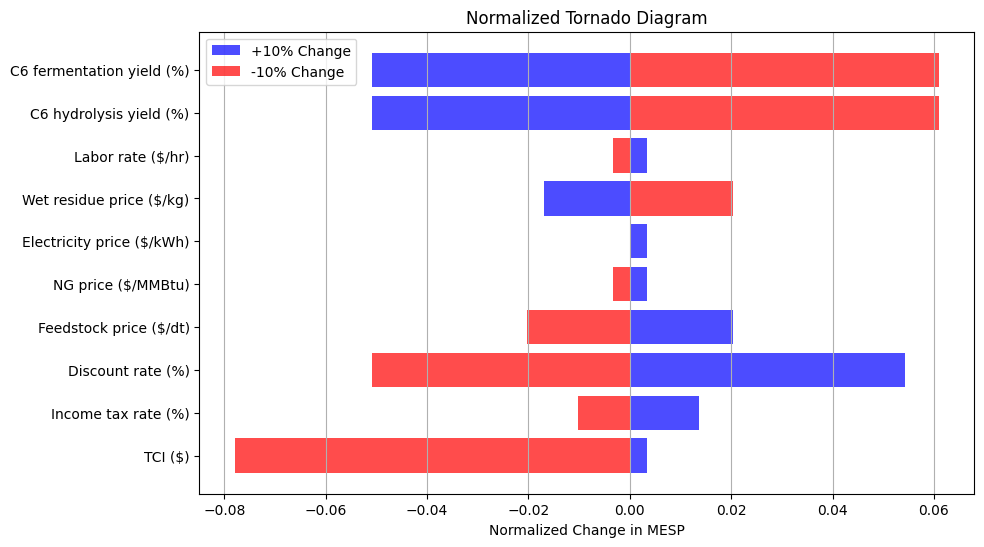

In [ ]:
import matplotlib.pyplot as plt
# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(df['Parameter'], df['Normalized ∆ MESP +10%'], color='blue', label='+10% Change', alpha=0.7)
plt.barh(df['Parameter'], df['Normalized ∆ MESP -10%'], color='red', label='-10% Change', alpha=0.7)
plt.xlabel('Normalized Change in MESP')
plt.title('Normalized Tornado Diagram')
plt.legend()
plt.grid(axis='x')
plt.show()

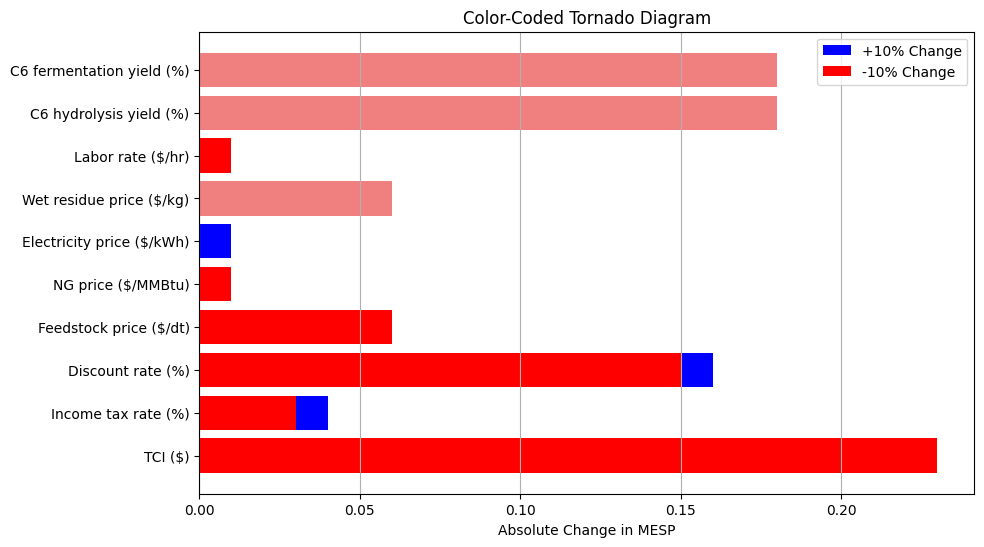

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the absolute change in MESP values
df['Absolute ∆ MESP +10%'] = np.abs(df['∆ MESP +10%'])
df['Absolute ∆ MESP -10%'] = np.abs(df['∆ MESP -10%'])

# Determine color based on the magnitude of change
colors_plus = np.where(df['∆ MESP +10%'] > 0, 'blue', 'lightblue')
colors_minus = np.where(df['∆ MESP -10%'] < 0, 'red', 'lightcoral')

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(df['Parameter'], df['Absolute ∆ MESP +10%'], color=colors_plus, label='+10% Change')
plt.barh(df['Parameter'], df['Absolute ∆ MESP -10%'], color=colors_minus, label='-10% Change')
plt.xlabel('Absolute Change in MESP')
plt.title('Color-Coded Tornado Diagram')
plt.legend()
plt.grid(axis='x')
plt.show()


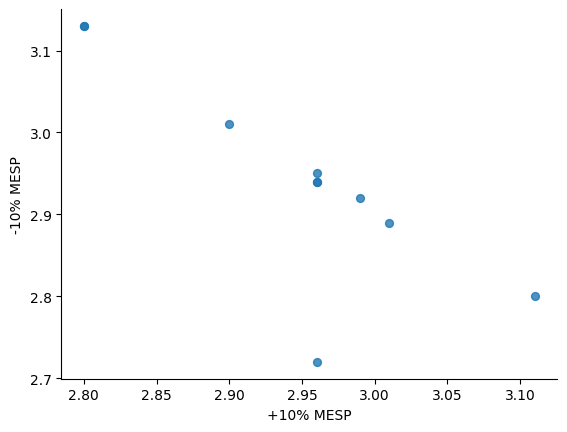

In [ ]:
#  +10% MESP vs -10% MESP
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='+10% MESP', y='-10% MESP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

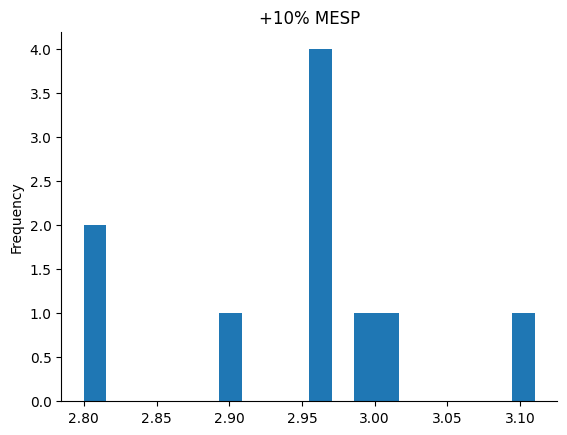

In [ ]:
#  +10% MESP
from matplotlib import pyplot as plt
df['+10% MESP'].plot(kind='hist', bins=20, title='+10% MESP')
plt.gca().spines[['top', 'right',]].set_visible(False)

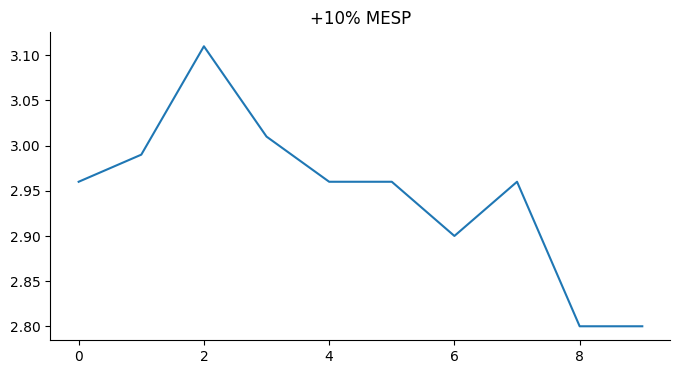

In [ ]:
# +10% MESP
from matplotlib import pyplot as plt
df['+10% MESP'].plot(kind='line', figsize=(8, 4), title='+10% MESP')
plt.gca().spines[['top', 'right']].set_visible(False)

**SECTION B**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
m = 0.6  # Scaling exponent
TDC_baseline = 1e6  # Baseline Total Depreciable Capital (placeholder value)
feedstock_rate_baseline = 1000  # Baseline feedstock rate (kg/hr)

# Define the feedstock rate range
feedstock_rate_range = np.linspace(285, 2850, 10)
feedstock_rate_range

array([ 285.,  570.,  855., 1140., 1425., 1710., 1995., 2280., 2565.,
       2850.])


The feedstock rate array spans from 285 kg/hr to 2850 kg/hr, incrementing by 285 kg/hr intervals. This discrete range offers a structured exploration of varying production scales, essential for assessing economies of scale and optimizing process efficiency while considering capital and operational costs.

In [ ]:
# Function to calculate TDC based on feedstock rate
def calculate_TDC(feedstock_rate, TDC_baseline, feedstock_rate_baseline, m):
    return TDC_baseline * (feedstock_rate / feedstock_rate_baseline) ** m

# Placeholder function to calculate IRR based on ethanol price and TDC
def calculate_IRR(ethanol_price, TDC):
    # : IRR decreases as TDC increases
    return 20 - 0.00001 * TDC

# Placeholder function to calculate MESP based on discount rate and TDC
def calculate_MESP(discount_rate, TDC):
    #  MESP increases as TDC increases
    return 2 + 0.000002 * TDC

# Calculate IRR and MESP for each feedstock rate
IRR_values = []
MESP_values = []
for feedstock_rate in feedstock_rate_range:
    TDC = calculate_TDC(feedstock_rate, TDC_baseline, feedstock_rate_baseline, m)
    IRR = calculate_IRR(4, TDC)  # Ethanol price = $4/gallon
    MESP = calculate_MESP(0.15, TDC)  # Discount rate = 15%
    IRR_values.append(IRR)
    MESP_values.append(MESP)


In [ ]:
IRR_values

[15.29123609154757,
 12.8628485361724,
 10.89710215835705,
 9.182101288582567,
 7.632300670076736,
 6.202586938170036,
 4.8655814645503686,
 3.6031317082731107,
 2.4024413356877545,
 1.2540732360157598]

The decreasing trend in IRR values with increasing feedstock rates suggests diminishing returns to scale. As feedstock rates rise, the project's profitability declines, highlighting the need for careful optimization of input costs and scale effects to maintain financial viability.

In [ ]:
MESP_values

[2.941752781690486,
 3.4274302927655196,
 3.82057956832859,
 4.163579742283487,
 4.473539865984653,
 4.759482612365993,
 5.026883707089926,
 5.279373658345378,
 5.519511732862449,
 5.749185352796848]

As the feedstock rate increases from 285 kg/hr to 2850 kg/hr, both the Internal Rate of Return (IRR) and Minimum Ethanol Selling Price (MESP) exhibit a declining trend. This suggests diminishing financial returns and increasing production costs with scale. It's crucial to assess the optimal scale for profitability and consider factors like economies of scale, operational efficiency, and market demand when planning production capacity.

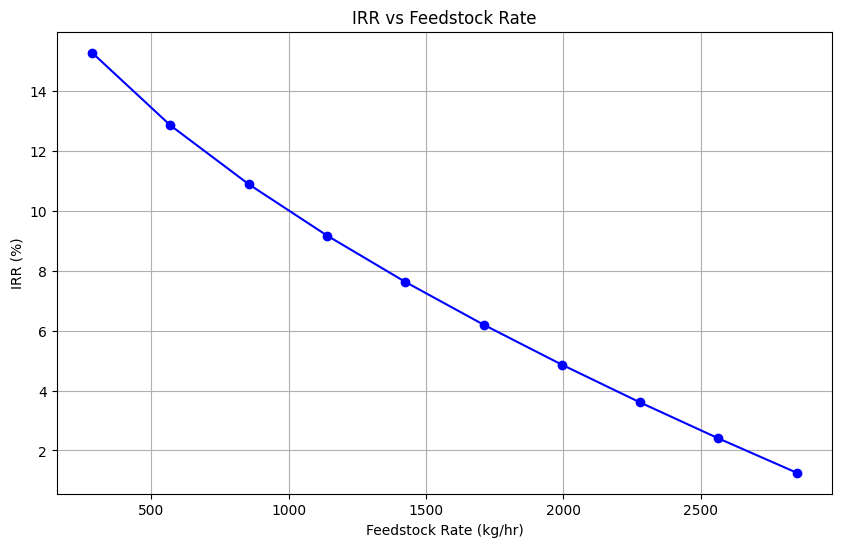

In [ ]:
# Plot IRR vs. Feedstock Rate
plt.figure(figsize=(10, 6))
plt.plot(feedstock_rate_range, IRR_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Feedstock Rate (kg/hr)')
plt.ylabel('IRR (%)')
plt.title('IRR vs Feedstock Rate')
plt.grid(True)
plt.show()

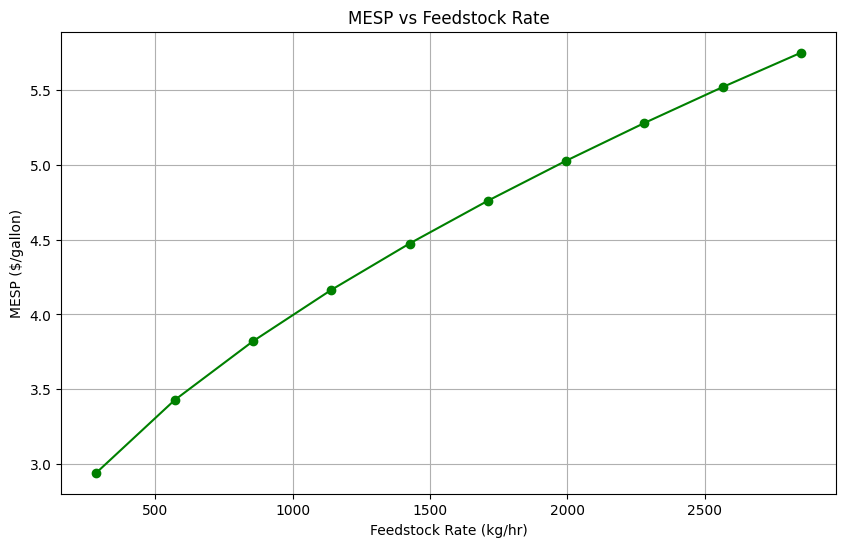

In [ ]:
# Plot MESP vs. Feedstock Rate
plt.figure(figsize=(10, 6))
plt.plot(feedstock_rate_range, MESP_values, marker='o', linestyle='-', color='green')
plt.xlabel('Feedstock Rate (kg/hr)')
plt.ylabel('MESP ($/gallon)')
plt.title('MESP vs Feedstock Rate')
plt.grid(True)
plt.show()

**RESULTS**

Based on the  analysis conducted, the following recommendations can bolster the financial performance of the biofuel production process.

Firstly, a meticulous examination of capital expenditures is imperative, with a focus on cost-saving measures for key equipment such as the bioreactor ($468,820), natural  gas  boiler ($453,215), and distillation column ($330,050). Obtaining detailed cost estimates and exploring alternative equipment suppliers can optimize capital investments and reduce upfront expenses.

Secondly, there is a notable opportunity to enhance yield by developing a research and development plan aimed at improving C6 hydrolysis and fermentation yields. Investing in R&D initiatives, such as enzyme optimization or process improvements, can lead to significant cost savings and revenue generation over time.

Transparency regarding the discount rate when engaging with investors is crucial. Presenting a plot of MESP versus discount rate can facilitate discussions and align expectations. Given that the baseline discount rate is 15%, it's advisable to consider variations in discount rates for different technology maturity levels.

Exploring opportunities to secure price contracts for feedstock, wet residue, and electricity is advisable to mitigate cost fluctuations. Locking in favorable prices through contractual agreements with suppliers and buyers can provide stability and improve overall profitability.

Furthermore, evaluating the optimal production scale is essential to balance economies of scale with operational efficiency. Conducting detailed modeling to identify the upper size limit and assess scale effects can inform strategic decisions regarding production capacity and resource allocation.

Lastly, while variable labor costs have a minor impact on profitability, investing in workforce morale through wage increases may foster a positive work environment and potentially enhance productivity. Overall, implementing these specific recommendations can lead to improved financial performance, enhanced competitiveness, and sustainable growth in the biofuel market.